# Exploratory Data Analysis


In [3]:
# source: https://www.kaggle.com/ntnu-testimon/paysim1
import os
import pandas as pd
import numpy as np

df = pd.read_csv("PS_20174392719_1491204439457_log.csv", na_values=['NA', '?'])
df = df.reindex(np.random.permutation(df.index))
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2684315,210,CASH_OUT,6866.36,C1188454292,43224.00,36357.64,C317923795,0.00,6866.36,0,0
1611640,156,CASH_OUT,14854.11,C651818649,0.00,0.00,C1413931484,2416230.97,2431085.08,0,0
4103155,301,PAYMENT,3305.22,C9715255,2040167.12,2036861.90,M1233596314,0.00,0.00,0,0
3698185,277,PAYMENT,413.45,C540465902,10327.00,9913.55,M1440218682,0.00,0.00,0,0
633163,35,CASH_OUT,192251.18,C1782428173,7079.00,0.00,C2031716136,0.00,192251.18,0,0


In [3]:
# ref: (Lopez Yse, 2020) https://www.kdnuggets.com/2020/07/exploratory-data-analysis-steroids.html
#
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
print(df.isnull().values.any())

False


In [10]:
legitimate, fraud = np.bincount(df.isFraud)
total = legitimate + fraud
percentage =  100 * fraud / total
print('Total:', total,'\nFraudulent transactions:',fraud,',', percentage,'%')

Total: 6362620 
Fraudulent transactions: 8213 , 0.12908204481801522 %


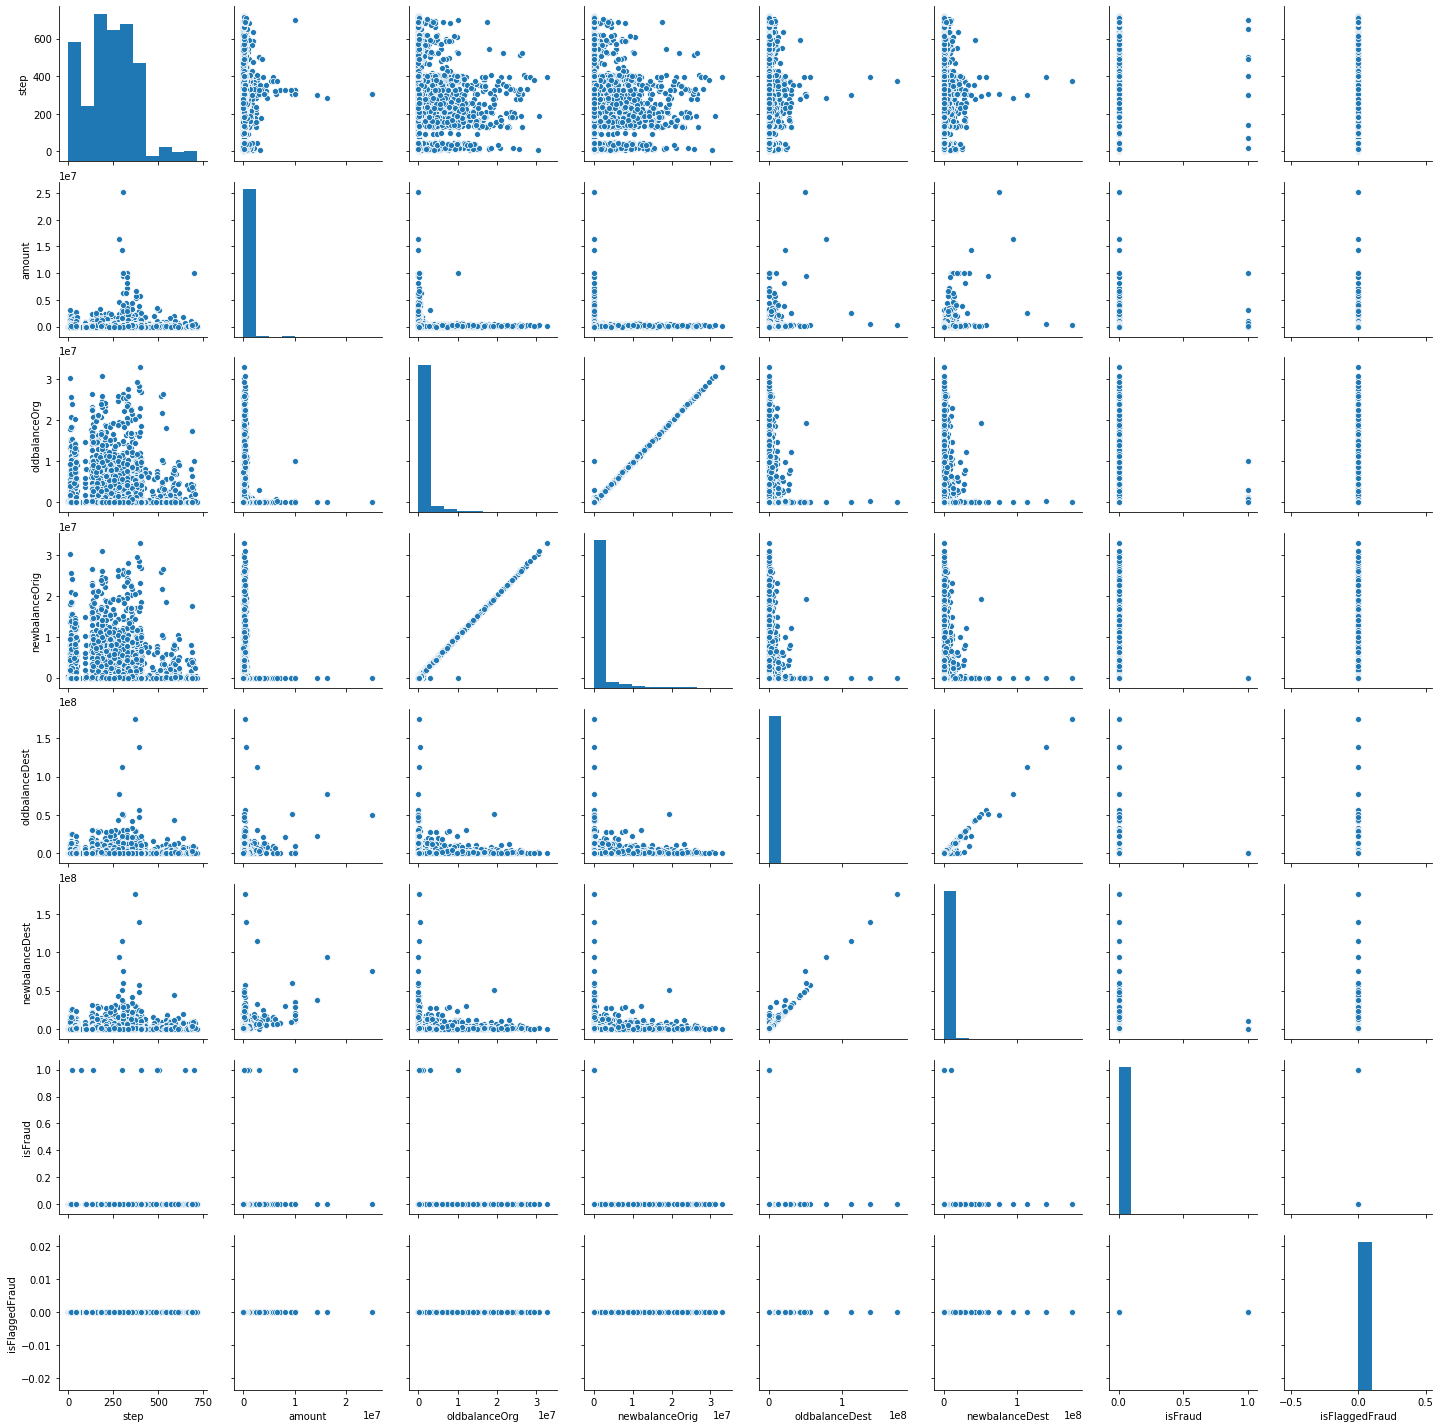

In [12]:
# Plotting column combinations to find correlation
# ref: (Lopez Yse, 2020) https://www.kdnuggets.com/2020/07/exploratory-data-analysis-steroids.html
# 2 lines
import seaborn as sns
small = df.head(10000)
sns.pairplot(small)

In [12]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

def columnEncoder(columns):
    for column_name,space in columns:
        enc.fit(df[column_name])
        enc_type = enc.transform(df[column_name])
        df.insert(space,"encoded_" + column_name,enc_type)
        df.pop(column_name)

change = [['nameOrig',4],['nameDest',7],['type',1]]

col_enc = columnEncoder(change)

df[:5]

,step,encoded_type,amount,encoded_nameOrig,oldbalanceOrg,newbalanceOrig,encoded_nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2684315,210,1,6866.36,618452,43224.00,36357.64,370439,0.00,6866.36,0,0
1611640,156,1,14854.11,5208503,0.00,0.00,122604,2416230.97,2431085.08,0,0
4103155,301,3,3305.22,6260021,2040167.12,2036861.90,832110,0.00,0.00,0,0
3698185,277,3,413.45,4841289,10327.00,9913.55,1061782,0.00,0.00,0,0
633163,35,1,192251.18,2570138,7079.00,0.00,305398,0.00,192251.18,0,0


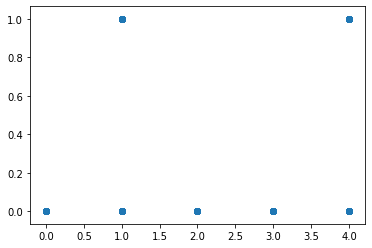

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter = ax.scatter(df["encoded_type"], df["isFraud"])

Column encoder is a helper function that takes is an array of column that strore non numerical data and returns them as numerical categories

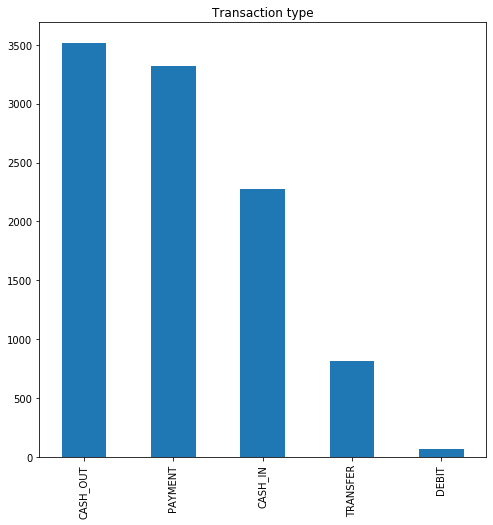

AxesSubplot(0.125,0.125;0.775x0.755)


In [21]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1)
small.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()
print(ax)

In [19]:
df

,step,encoded_type,amount,encoded_nameOrig,oldbalanceOrg,newbalanceOrig,encoded_nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
72901,10,3,36366.62,2783940,0.00,0.00,2245250,0.00,0.00,0,0
5721678,398,3,71120.24,2557460,0.00,0.00,2216101,0.00,0.00,0,0
1005148,46,1,160934.46,5247152,21927.00,0.00,567003,15229.64,176164.09,0,0
2510665,205,0,149356.10,4184080,7673400.74,7822756.84,376545,205311.51,55955.41,0,0
794210,40,4,190075.03,2520520,9477.00,0.00,162626,0.00,190075.03,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5083244,355,1,11683.54,2095815,42228.00,30544.46,458146,116994.03,128677.57,0,0
3979988,297,1,39657.85,3183153,0.00,0.00,393256,161311.28,200969.13,0,0
4411600,322,1,187660.05,5499,32178.00,0.00,537160,0.00,187660.05,0,0
5249611,371,1,152367.54,228133,102756.00,0.00,113504,0.00,152367.54,0,0
